<a href="https://colab.research.google.com/github/mustafabozkaya/PythonDataScienceHandbooks/blob/main/breast-cancer-eda-pca-svm-lr-rf-dt-gb-gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Eda  PCA, SVM,LR,RF,DTree,GaradientBost,GridSearchCV Param Tuning - 99% Accuracy 

**Breast Cancer Data Analysis**


![](https://www.sysmex-europe.com/fileadmin/_processed_/a/9/csm_LifeScience_StageImage_BreastCancer_1500x600-01_2498abd1e0.jpg)

In this tutorial, based on the data we are going to find out if the cancer is benign or malignant. We would use python libraries such as Numpy, Pandas and Plotly. We would use classification techniques to predict the values (1 or 0) on our dataset. 

**Source** : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Let's start off by installing and import the required libraries into our code

In [ ]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msn
%matplotlib inline

In [ ]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (18, 12)

`sklearn` provides this dataset for us to work with so we are going to be using the same library for importing our dataset and loading into a dataframe with the help of `Pandas` library

In [ ]:
import os 

for file in os.listdir("../input/"):
  print(file)

titanicdataset-traincsv
breast-cancer-wisconsin-data


In [ ]:
Data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
Df=Data.copy()

In [ ]:
Df[:1] 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [ ]:
Df[:1]["radius_mean"] 

0    17.99
Name: radius_mean, dtype: float64

In [ ]:
Df.iloc[:,1:]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
Df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
Df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
Df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Exploratory Data Analysis aka EDA

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [ ]:
fig = px.bar(Df, 
            x='diagnosis', 
            y='radius_mean', 
            color='perimeter_mean',
            hover_data=["radius_mean"], 
            title='Radius Mean vs Diagnosis')
fig.update_xaxes(showgrid=False)   #Turning the grid off
fig.update_yaxes(showgrid=False)   #Turning the grid off
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})  #removing the background color
fig.show()

In [ ]:
for template in ["none"]:
    fig = px.bar(Df,
                     x="compactness_mean", 
                     y="diagnosis", 
                     color="compactness_mean",
                     log_x=True, 
                     template=template, 
                     title="Compactness Mean Vs Diagnosis")
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
    fig.show()

In [ ]:
fig = px.histogram(Df, 
                   x='diagnosis', 
                   color_discrete_sequence=['red'],
                   title='Diagnosis Count')
fig.update_layout(bargap=0.3)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

<AxesSubplot:>

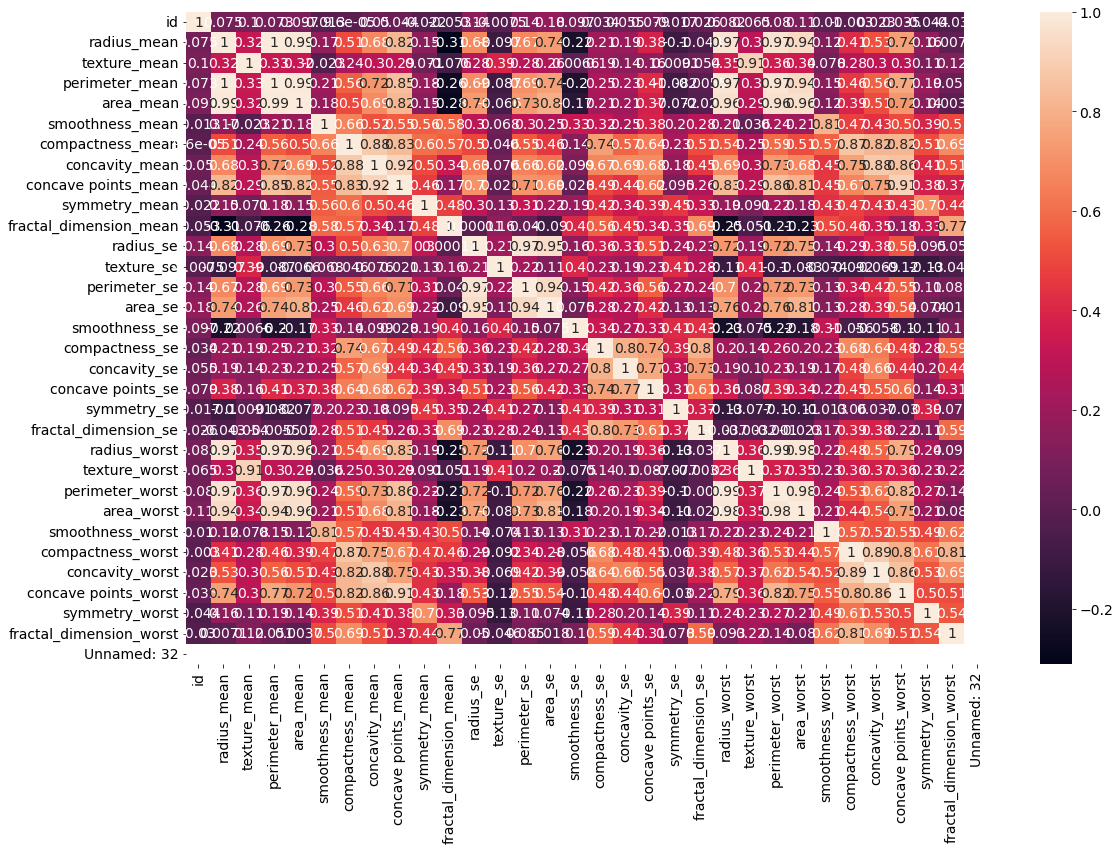

In [ ]:
sns.heatmap(Df.corr(),annot=True,fmt=".2g")

From our analysis above, we saw there are 357 Benign Cases and 212 Malignant breast cancer cases. Compactness Mean is more in the Malignant Cases as compared to the Benign Cases.

## Data Pre-processing
Now, lets start processing our data and make sure its in line with the requirements of the machine learning ecosystem as we wanna make sure there is no categorical data since Machine Learning Algorithms cannot work with Categorical data.

Fortunately, we don't have the categorical columns in our dataset so we are just using slicing method to make a list of columns for independent(input) and dependent variable(output)

In [ ]:
Df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
input_cols = Df.columns[2:-1]
input_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
target_col =  Df.columns[1]
target_col

'diagnosis'

In [ ]:
inputs_df = Df[list(input_cols)].copy()
inputs_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
targets = Df[(target_col)]
targets

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

### Data Scaling

We want to scale the data as in the machine learning algorithms if the values of the features are closer to each other there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Df[input_cols])
Df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols].describe().loc[['min', 'max'],:]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
min,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0000,0.0000,0.106,0.04996,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.000,0.000,0.1565,0.05504
max,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.4268,0.2012,0.304,0.09744,...,36.04,49.54,251.20,4254.0,0.22260,1.05800,1.252,0.291,0.6638,0.20750


## Principal Component Analysis (PCA)
Principal Component Analysis is a way to reduce the number of variables while maintaining the majority of the important information. It transforms a number of variables that may be correlated into a smaller number of uncorrelated variables, known as principal components.

The main objective of PCA is to simplify your model features into fewer components to help visualize patterns in your data and to help your model run faster. Using PCA also reduces the chance of overfitting your model by eliminating features with high correlation.

In [ ]:
from sklearn.preprocessing import scale
from sklearn import decomposition
X = scale(inputs_df)
pca = decomposition.PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [ ]:
scores = pca.transform(X)
cols=[f'PCA{i+1}' for i in range(10)]
scores_df = pd.DataFrame(scores, columns=cols)
scores_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398408,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097374,0.024065,0.454276
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059566,-1.405441,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


<AxesSubplot:>

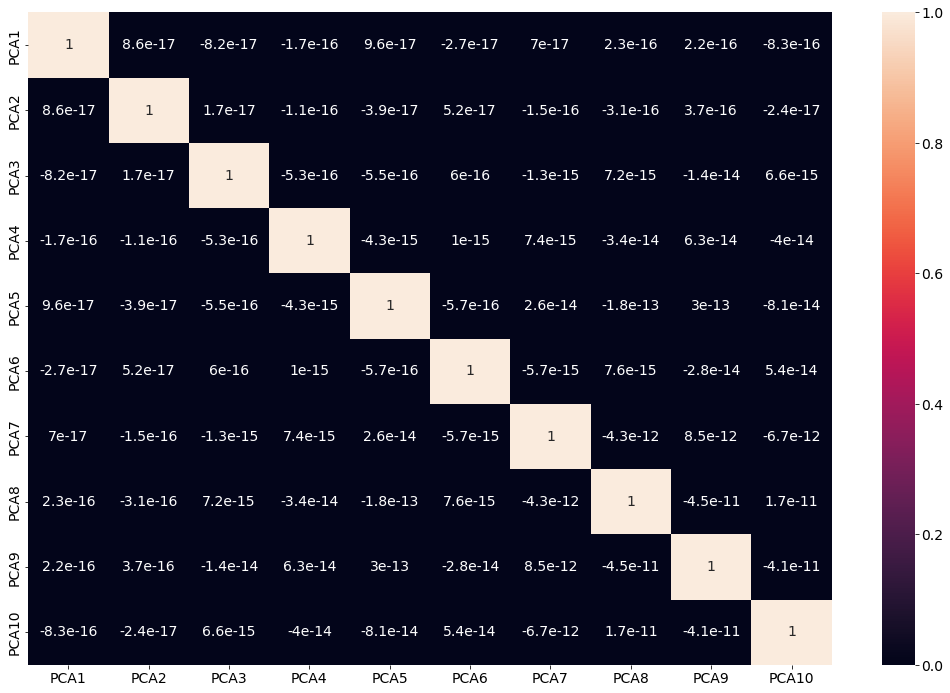

In [ ]:
sns.heatmap(scores_df.corr(),annot=True,fmt=".2g")

In [ ]:
target = pd.Series(targets, name='target')
target

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: target, Length: 569, dtype: object

In [ ]:
result_df = pd.concat([scores_df, target], axis=1)
result_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398408,-0.157118,-0.877402,M
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711905,1.106995,M
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097374,0.024065,0.454276,M
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059566,-1.405441,-1.116975,M
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,M


In [ ]:
type(scores),scores.shape,scores_df.dtypes,scores_df.shape

(numpy.ndarray,
 (569, 10),
 PCA1     float64
 PCA2     float64
 PCA3     float64
 PCA4     float64
 PCA5     float64
 PCA6     float64
 PCA7     float64
 PCA8     float64
 PCA9     float64
 PCA10    float64
 dtype: object,
 (569, 10))

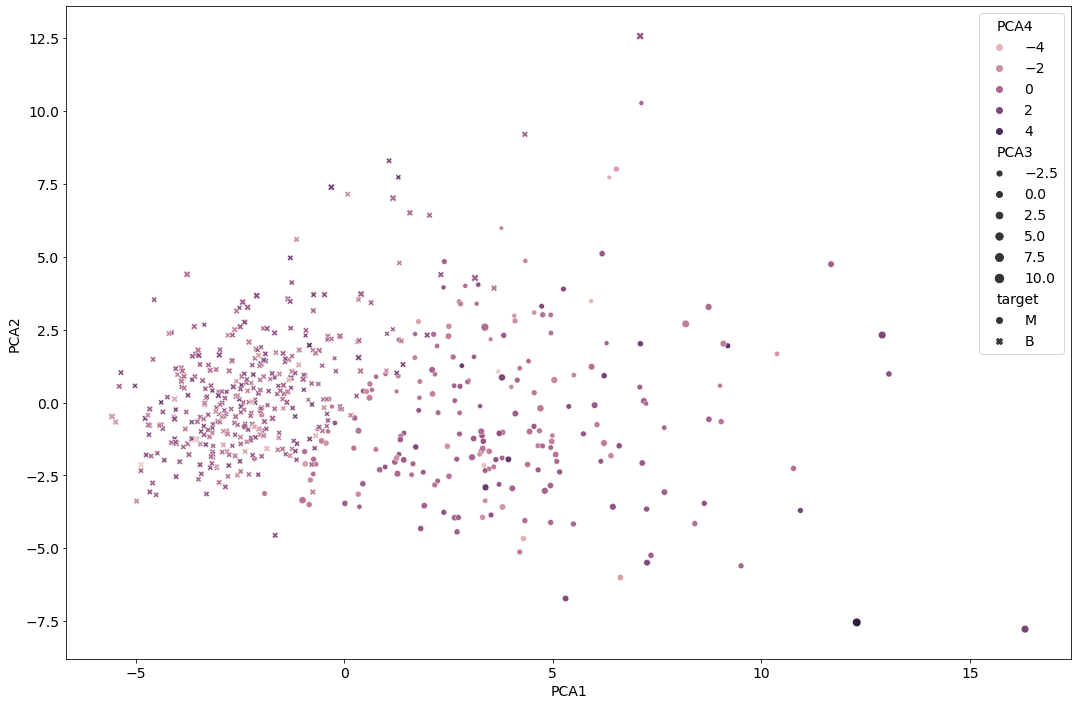

In [ ]:
sns.scatterplot(data=result_df, x="PCA1", y="PCA2",size="PCA3",style="target", hue="PCA4");

### Explained Variance Ratio

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

In [ ]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]

 Total Variance Explained: 95.16


We can see that our first 10 principal components explain the majority of the variance in this dataset (95.3%)! This is an indication of the total information represented compared to the original data.

## Splitting Data
We start the process of training our data now that we are done with preprocessing of the data. Lets go ahead and split the data into 2 splits i.e. training and validation data. Training data will be used to train our model and we will validate the score on the validation data.

We have taken the test size as 0.25 since we don't want to train our model on the entire dataset and then end up having the model learn nothing when new set of data is thrown at it.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test, y_train , y_test = train_test_split(scores, 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [ ]:
X_train.shape, y_train.shape, x_test.shape, y_test.shape

((426, 10), (426,), (143, 10), (143,))

## Training Models to find the best one

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score,adjusted_rand_score,auc,plot_roc_curve,f1_score,roc_auc_score,roc_curve

In [ ]:
names = ['LR', "KNN", "SVM","GBoost", "DT", "RF"]
classifiers = [
    LogisticRegression(solver='liblinear'),
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100)]

In [ ]:
scores = []
accurancy=[]
for name, clf in zip(names, classifiers):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test)
    score = clf.score(x_test, y_test)
    accurance=accuracy_score(y_test,y_pred)
    scores.append(score)
    accurancy.append(accurance)

In [ ]:
scores_df = pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = scores
scores_df["accurance"]=accurancy
scores_df.sort_values('score', ascending= False)

,name,score,accurance
2,SVM,0.993007,0.993007
0,LR,0.986014,0.986014
1,KNN,0.965035,0.965035
3,GBoost,0.965035,0.965035
5,RF,0.951049,0.951049
4,DT,0.944056,0.944056


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



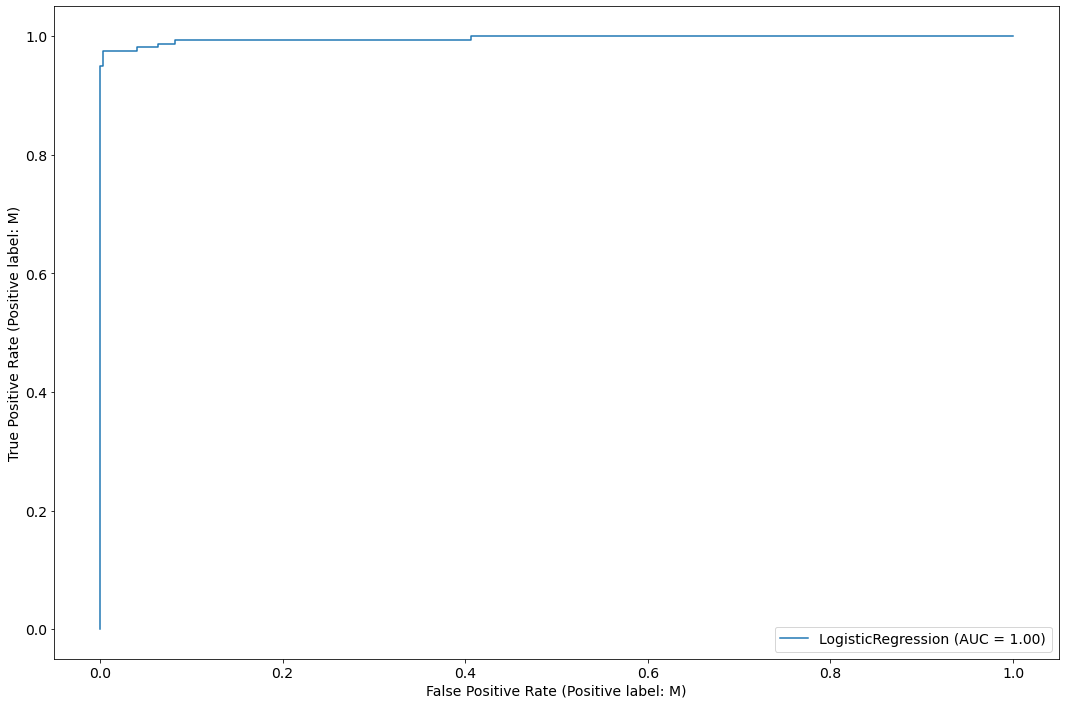

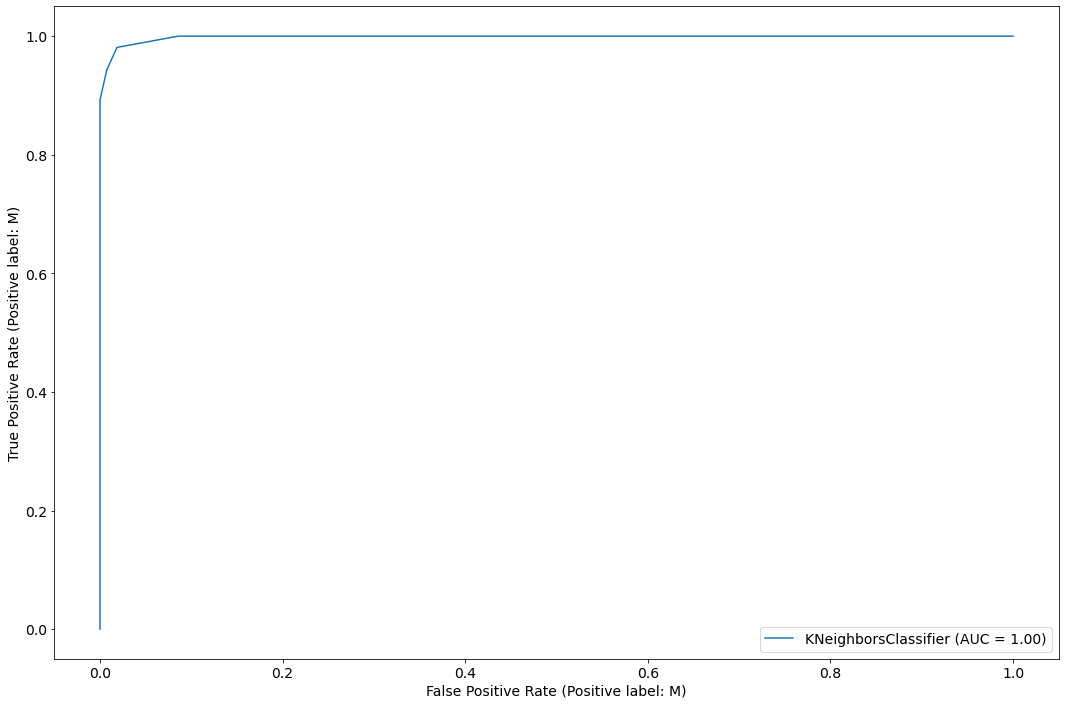

In [ ]:
plot_roc_curve(classifiers[0],X_train,y_train)
plot_roc_curve(classifiers[1],X_train,y_train)

We would NOT be picking the Gradient Boosting and Decision Tree since the test/validation score is less than 96%. Let's go ahead and tune some Hyperparameters.

## Hyperparameter Tuning for all the models

When creating a machine learning model, you'll be presented with design choices as to how to define your model architecture. Often times, we don't immediately know what the optimal model architecture should be for a given model, and thus we'd like to be able to explore a range of possibilities. 

In true machine learning fashion, we'll ideally ask the machine to perform this exploration and select the optimal model architecture automatically. Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning which is what he have done using `GridSearchCV` and `RandomizedSearchCV`.

In [ ]:
#?np.arange

In [ ]:
#?LogisticRegression

## GridSearch Hyperparameter Tunnig

In [ ]:
from sklearn.model_selection import GridSearchCV
C_range = np.arange(1,10,2)
penalty = ['l1', 'l2', 'elasticnet']
max_iter_range = np.arange(50,500,20)
solver=['newton-cg', 'lbfgs', 'liblinear']
param_grid = dict(C=C_range, penalty=penalty,solver=solver, max_iter= max_iter_range)
model = LogisticRegression()

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train )
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'} with a score of 0.98


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5750 fits failed out of a total of 10350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1150 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError

In [ ]:
neighbors_range = np.arange(1,7,1)
leaf_size_range = np.arange(10,40,10)
param_grid = dict(n_neighbors=neighbors_range, leaf_size=leaf_size_range)
model = KNeighborsClassifier(n_jobs=-1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train )
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'leaf_size': 10, 'n_neighbors': 1} with a score of 0.96


In [ ]:
Kernel_range = ['linear','rbf']
C_range = np.arange(1,15,1)
param_grid = dict(kernel=Kernel_range, C= C_range)
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train )
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 2, 'kernel': 'rbf'} with a score of 0.98


## Randomized Search Cv Hyperparameter Tunnig

In [ ]:
max_depth_range = np.arange(1,8,1)
max_features_range= np.arange(1,6,1)
max_leaf_nodes_range = np.arange(2,100,10)
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(max_depth=max_depth_range, max_features=max_features_range, max_leaf_nodes=max_leaf_nodes_range)
model = RandomForestClassifier(n_jobs=-1, random_state=42)
clf = RandomizedSearchCV(model, distributions, random_state=42)
clf.fit(train_inputs, train_targets)
print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

NameError: name 'train_inputs' is not defined

Now that we are done tuning all our models, let's put those numbers in as is and see what is the best model that we have for this dataset.

In [ ]:
names = ['LogisticRegression', "Nearest_Neighbors", "Linear_SVM", "Random_Forest"]
classifiers = [
    LogisticRegression(C=2,max_iter=100, penalty='l2',solver='liblinear'),
    KNeighborsClassifier(leaf_size=10, n_neighbors=5),
    SVC(kernel="linear", C=4),
    RandomForestClassifier(max_leaf_nodes=82,max_features=4, max_depth=5)]

In [ ]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train,y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

In [ ]:
scores_df = pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = scores
scores_df.sort_values('score', ascending= False)

We can clearly see that **Logistic Regression** and **SVM** has given us the best accuracy score.

**SUMMARY OF THE NOTEBOOK:-**

1. 357 Benign Cases and 212 Malignant breast cancer cases. Compactness Mean is more in the Malignant Cases as compared to the Benign Cases.
2. Depending upon the data and the computational power, one should use GridSearch or RandomizedSearch for hyperparameter tuning
3. PCA is a great way to shift from high dimensionality to low dimensionality. If we have more features than observations than we run the risk of massively overfitting our model — this would generally result in terrible out of sample performance.
4. Relying on complex algorithms always should not be the way out. Sometimes, even a simpler algorithms can work wonders.

**Resources**
 https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

I HOPE This NOTEBOOK HELPED YOU IN SOME WAY. THANKS FOR UPVOTE